In [1]:
import pandas as pd
dataset=pd.read_csv('PrePlacement.csv')
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [2]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [3]:
from Variate import Univariate
qual,quan=Univariate.datatsetype(dataset)
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [4]:
quan.remove(quan[0])
dataset[quan].cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,58.853253,42.702550,37.659225,24.535952,9.088585e+05
hsc_p,58.853253,112.063731,33.684453,33.838355,21.517688,7.310079e+05
degree_p,42.702550,33.684453,53.604710,22.078774,17.185200,4.663363e+05
etest_p,37.659225,33.838355,22.078774,176.251018,16.886973,3.727004e+05
mba_p,24.535952,21.517688,17.185200,16.886973,34.028376,1.239934e+05
salary,908858.485818,731007.850848,466336.264888,372700.449468,123993.387361,2.259185e+10


In [5]:
#degree_p vs etest_p
#variance is 22 greater positive variance number so difference between degree pass and e-test pass marks are having moderate spread of data
#etest_p vs mba_p
#variance is 16 greater positive variance number so difference between mba_p pass and mba_p pass marks are having moderate spread of data

In [6]:
dataset[quan].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


In [7]:
#mba_p vs salary
# The corelation is '0.141417' <0.54 of low degree thus corelation is scattered . 14% of the students are getting mean salary amount

In [8]:
import seaborn as sb


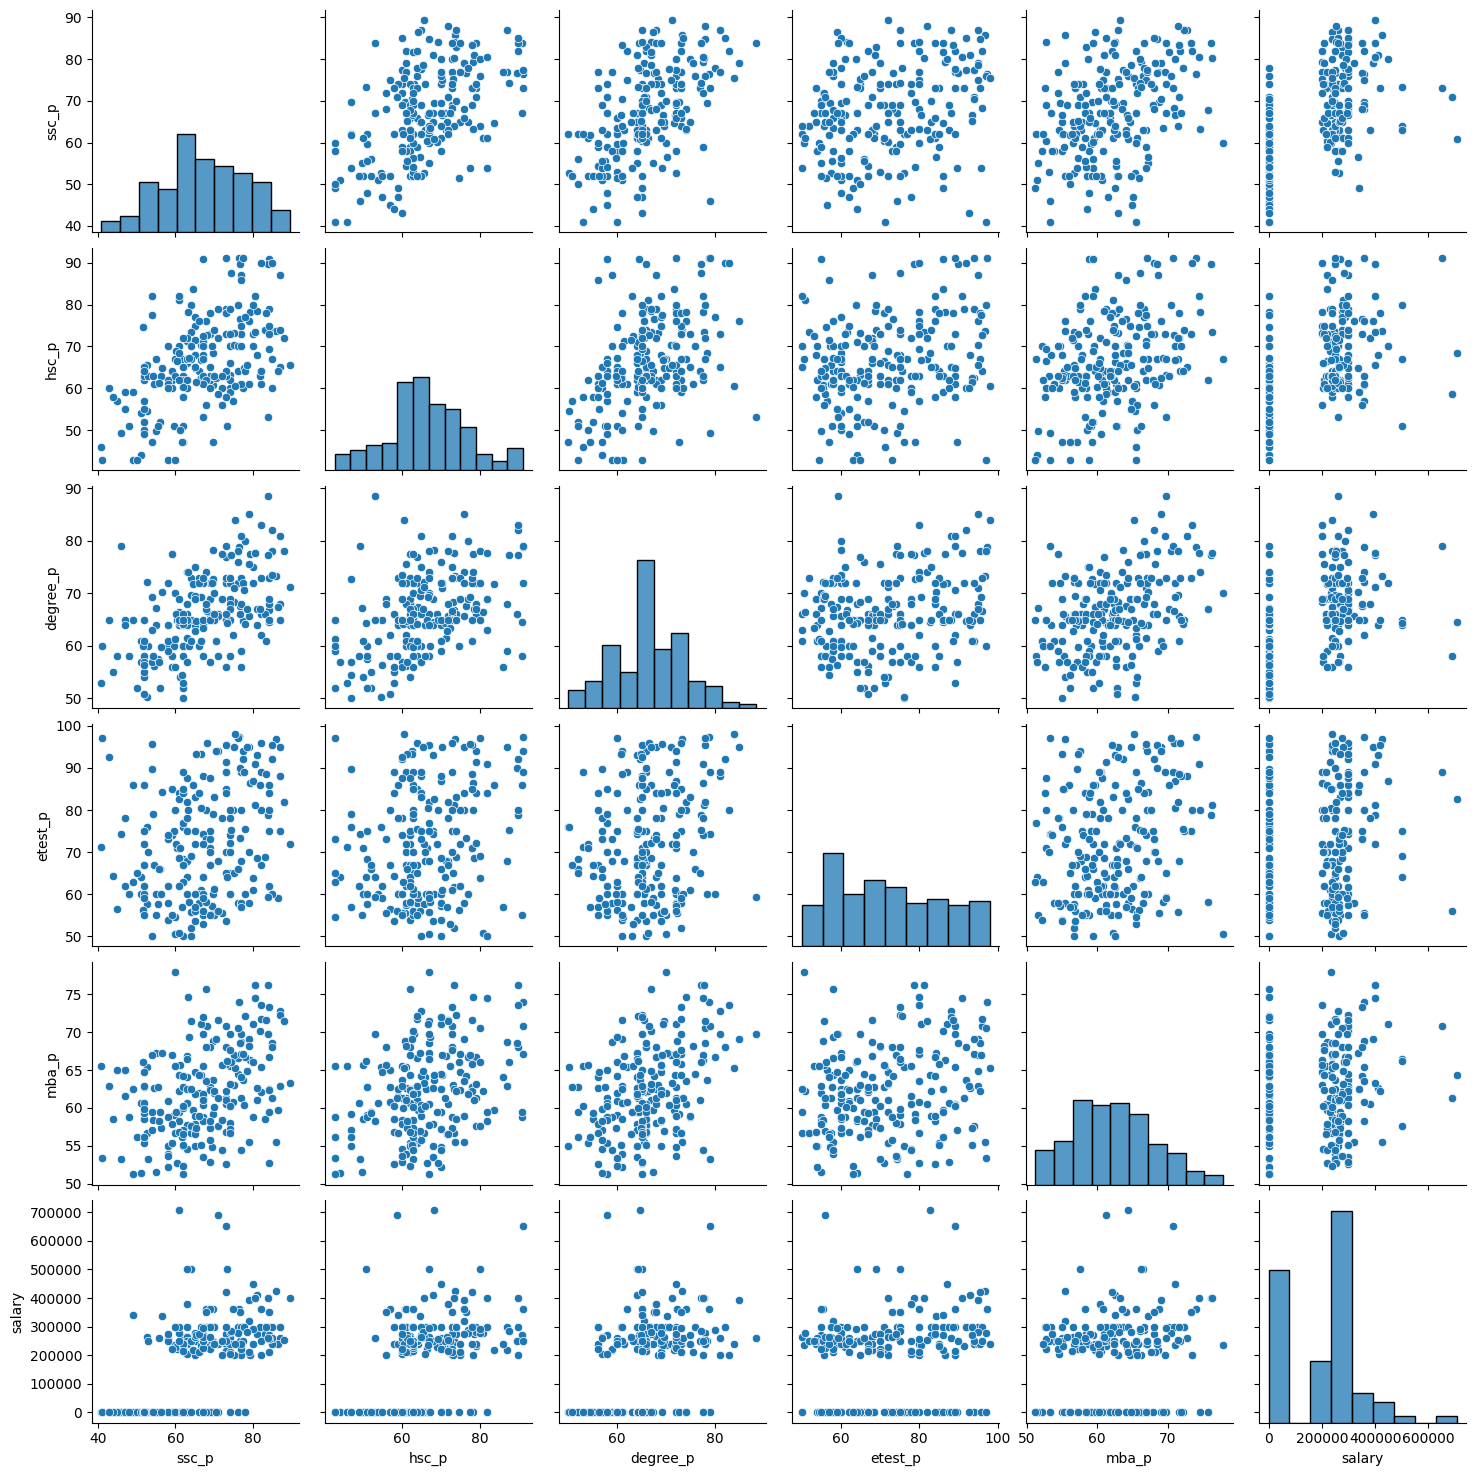

In [9]:
sb.pairplot(dataset[quan])

In [10]:
#!pip install statsmodels

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(data):
    #assigning empty table
    variance=pd.DataFrame()
    #storing all the columns into the table
    variance["variables"]=data.columns
    #iterating argument parameter size and passing each iteration into variance_inflation_factor.
    #variance_inflation_factor is calculating the input over all other inputs by using arugument values and and iteration size
    variance['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return (variance)
    

In [12]:
dataset[quan]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


In [13]:
variance=vif(dataset[['salary','ssc_p']])
variance

,variables,vif
0,salary,3.397589
1,ssc_p,3.397589


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset[quan]=scaler.fit_transform(dataset[quan])
dataset[quan]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,-0.028087,2.335422,-1.144306,-1.291091,-0.597647,0.482708
1,1.113369,1.135767,1.522551,1.087157,0.687620,0.015904
2,-0.213238,0.157674,-0.322892,0.218908,-0.769474,0.349335
3,-1.046417,-1.357281,-1.965720,-0.460592,-0.489396,-1.317822
4,1.712332,0.687909,0.950300,1.864806,-1.164676,1.516345
...,...,...,...,...,...,...
210,1.230940,1.483260,1.538980,1.426906,2.098321,1.349629
211,-0.861266,-0.599803,0.772327,0.143408,-1.487711,0.516051
212,-0.028087,0.062990,0.909229,-0.989091,1.278706,0.649424
213,0.619941,-0.031695,-1.144306,-0.158592,-0.351934,0.042578


In [15]:
variance=vif(dataset[quan])
variance

,variables,vif
0,ssc_p,1.966202
1,hsc_p,1.554751
2,degree_p,1.602162
3,etest_p,1.109549
4,mba_p,1.339867
5,salary,1.627976


In [16]:
#After pre-processing the dataset, now vif values are moderate ( 1 to 5)

In [17]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [18]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,-0.028087,Others,2.335422,Others,Commerce,-1.144306,Sci&Tech,No,-1.291091,Mkt&HR,-0.597647,Placed,0.482708
1,2,M,1.113369,Central,1.135767,Others,Science,1.522551,Sci&Tech,Yes,1.087157,Mkt&Fin,0.687620,Placed,0.015904
2,3,M,-0.213238,Central,0.157674,Central,Arts,-0.322892,Comm&Mgmt,No,0.218908,Mkt&Fin,-0.769474,Placed,0.349335
3,4,M,-1.046417,Central,-1.357281,Central,Science,-1.965720,Sci&Tech,No,-0.460592,Mkt&HR,-0.489396,Not Placed,-1.317822
4,5,M,1.712332,Central,0.687909,Central,Commerce,0.950300,Comm&Mgmt,No,1.864806,Mkt&Fin,-1.164676,Placed,1.516345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,1.230940,Others,1.483260,Others,Commerce,1.538980,Comm&Mgmt,No,1.426906,Mkt&Fin,2.098321,Placed,1.349629
211,212,M,-0.861266,Others,-0.599803,Others,Science,0.772327,Sci&Tech,No,0.143408,Mkt&Fin,-1.487711,Placed,0.516051
212,213,M,-0.028087,Others,0.062990,Others,Commerce,0.909229,Comm&Mgmt,Yes,-0.989091,Mkt&Fin,1.278706,Placed,0.649424
213,214,F,0.619941,Others,-0.031695,Others,Commerce,-1.144306,Comm&Mgmt,No,-0.158592,Mkt&HR,-0.351934,Placed,0.042578


In [19]:
from scipy.stats import ttest_ind
Central=dataset[dataset['ssc_b']=='Central']['salary']
Others=dataset[dataset['ssc_b']=='Others']['salary']
ttest_ind(Central, Others)

TtestResult(statistic=np.float64(-0.6182213205902317), pvalue=np.float64(0.5370899470596879), df=np.float64(213.0))

In [20]:
#p value is high(more than 5 % (0.53)) hence mean value are high
# Central and Others category of ssc_b variance diference is relative, there is no significant difference of salary between two and difference
#is random difference and not siginifcant difference.
#conclusion:
#Most of the two board of students are getting random difference salary.

In [30]:
from scipy.stats import ttest_rel
com_mba=dataset[dataset['hsc_s']=='Commerce']['mba_p']
com_etest=dataset[dataset['hsc_s']=='Commerce']['etest_p']
ttest_rel(com_mba, com_etest)

TtestResult(statistic=np.float64(-0.23012741070604587), pvalue=np.float64(0.8184125561758128), df=np.int64(112))

In [31]:
#p value is high(more than 5 % (0.81)) hence mean value are high
#Accepts alternate hypothesis 
#Failed to Rejects null hypothesis
#Conclusion:
#Hr.sec students of Commerce are having no significant and random difference pass marks in maba and entrance test.
#There is no significant difference between Commerce students in MBA and entrance test pass marks.


In [26]:
from scipy.stats import stats
stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'])

C:\Users\Diwali 6\AppData\Local\Temp\ipykernel_13096\261866097.py:2: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'])


F_onewayResult(statistic=np.float64(2.4571024779880398e-29), pvalue=np.float64(0.999999999999996))

In [32]:
#probability is 99% hence null hypthosis is rejected.
#conclusion:
#SSC and Hr.sec pass marks difference is random.

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols(
    'salary ~ C(ssc_b) + C(gender) + C(ssc_b):C(gender)',
    data=dataset
).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)


                        sum_sq     df         F    PR(>F)
C(ssc_b)              0.336647    1.0  0.337935  0.561644
C(gender)             4.287408    1.0  4.303801  0.039240
C(ssc_b):C(gender)    0.131189    1.0  0.131691  0.717049
Residual            210.196307  211.0       NaN       NaN


In [33]:
# Excluding gender column, most of them are having >0.05 probability value from the observation of PR(>F)
#ssc board is not having siginificant difference on the salary received by ssc board students.
#Gender is having siginifacnt difference on the salary and gender is having statistical strong siginificant variance with salary.
#Both ssc and gender categories are no siginificant difference on students salary. And both are having random difference on board and gender with
#salary they are getting.